In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df_sky = pd.read_csv("Skyserver_12_30_2019 4_49_58 PM.csv")

In [4]:
#Basic information about the data set
print(df_sky.head())
print(df_sky.describe())
print(df_sky.info())

                 objid          ra        dec         u         g         r  \
0  1237666301628060000   47.372545   0.820621  18.69254  17.13867  16.55555   
1  1237673706652430000  116.303083  42.455980  18.47633  17.30546  17.24116   
2  1237671126974140000  172.756623  -8.785698  16.47714  15.31072  15.55971   
3  1237665441518260000  201.224207  28.771290  18.63561  16.88346  16.09825   
4  1237665441522840000  212.817222  26.625225  18.88325  17.87948  17.47037   

          i         z   run  rerun  camcol  field            specobjid  \
0  16.34662  16.17639  4849    301       5    771  8168632633242440000   
1  17.32780  17.37114  6573    301       6    220  9333948945297330000   
2  15.72207  15.82471  5973    301       1     13  3221211255238850000   
3  15.70987  15.43491  4649    301       3    121  2254061292459420000   
4  17.17441  17.05235  4649    301       3    191  2390305906828010000   

    class  redshift  plate    mjd  fiberid  
0    STAR  0.000115   7255  56597  

In [3]:
df_dim_sky = df_sky.shape

df_sky.loc[df_sky['class'] == 'STAR', ['u', 'g', 'r', 'i', 'z']]

df_cnames = list(df_sky)

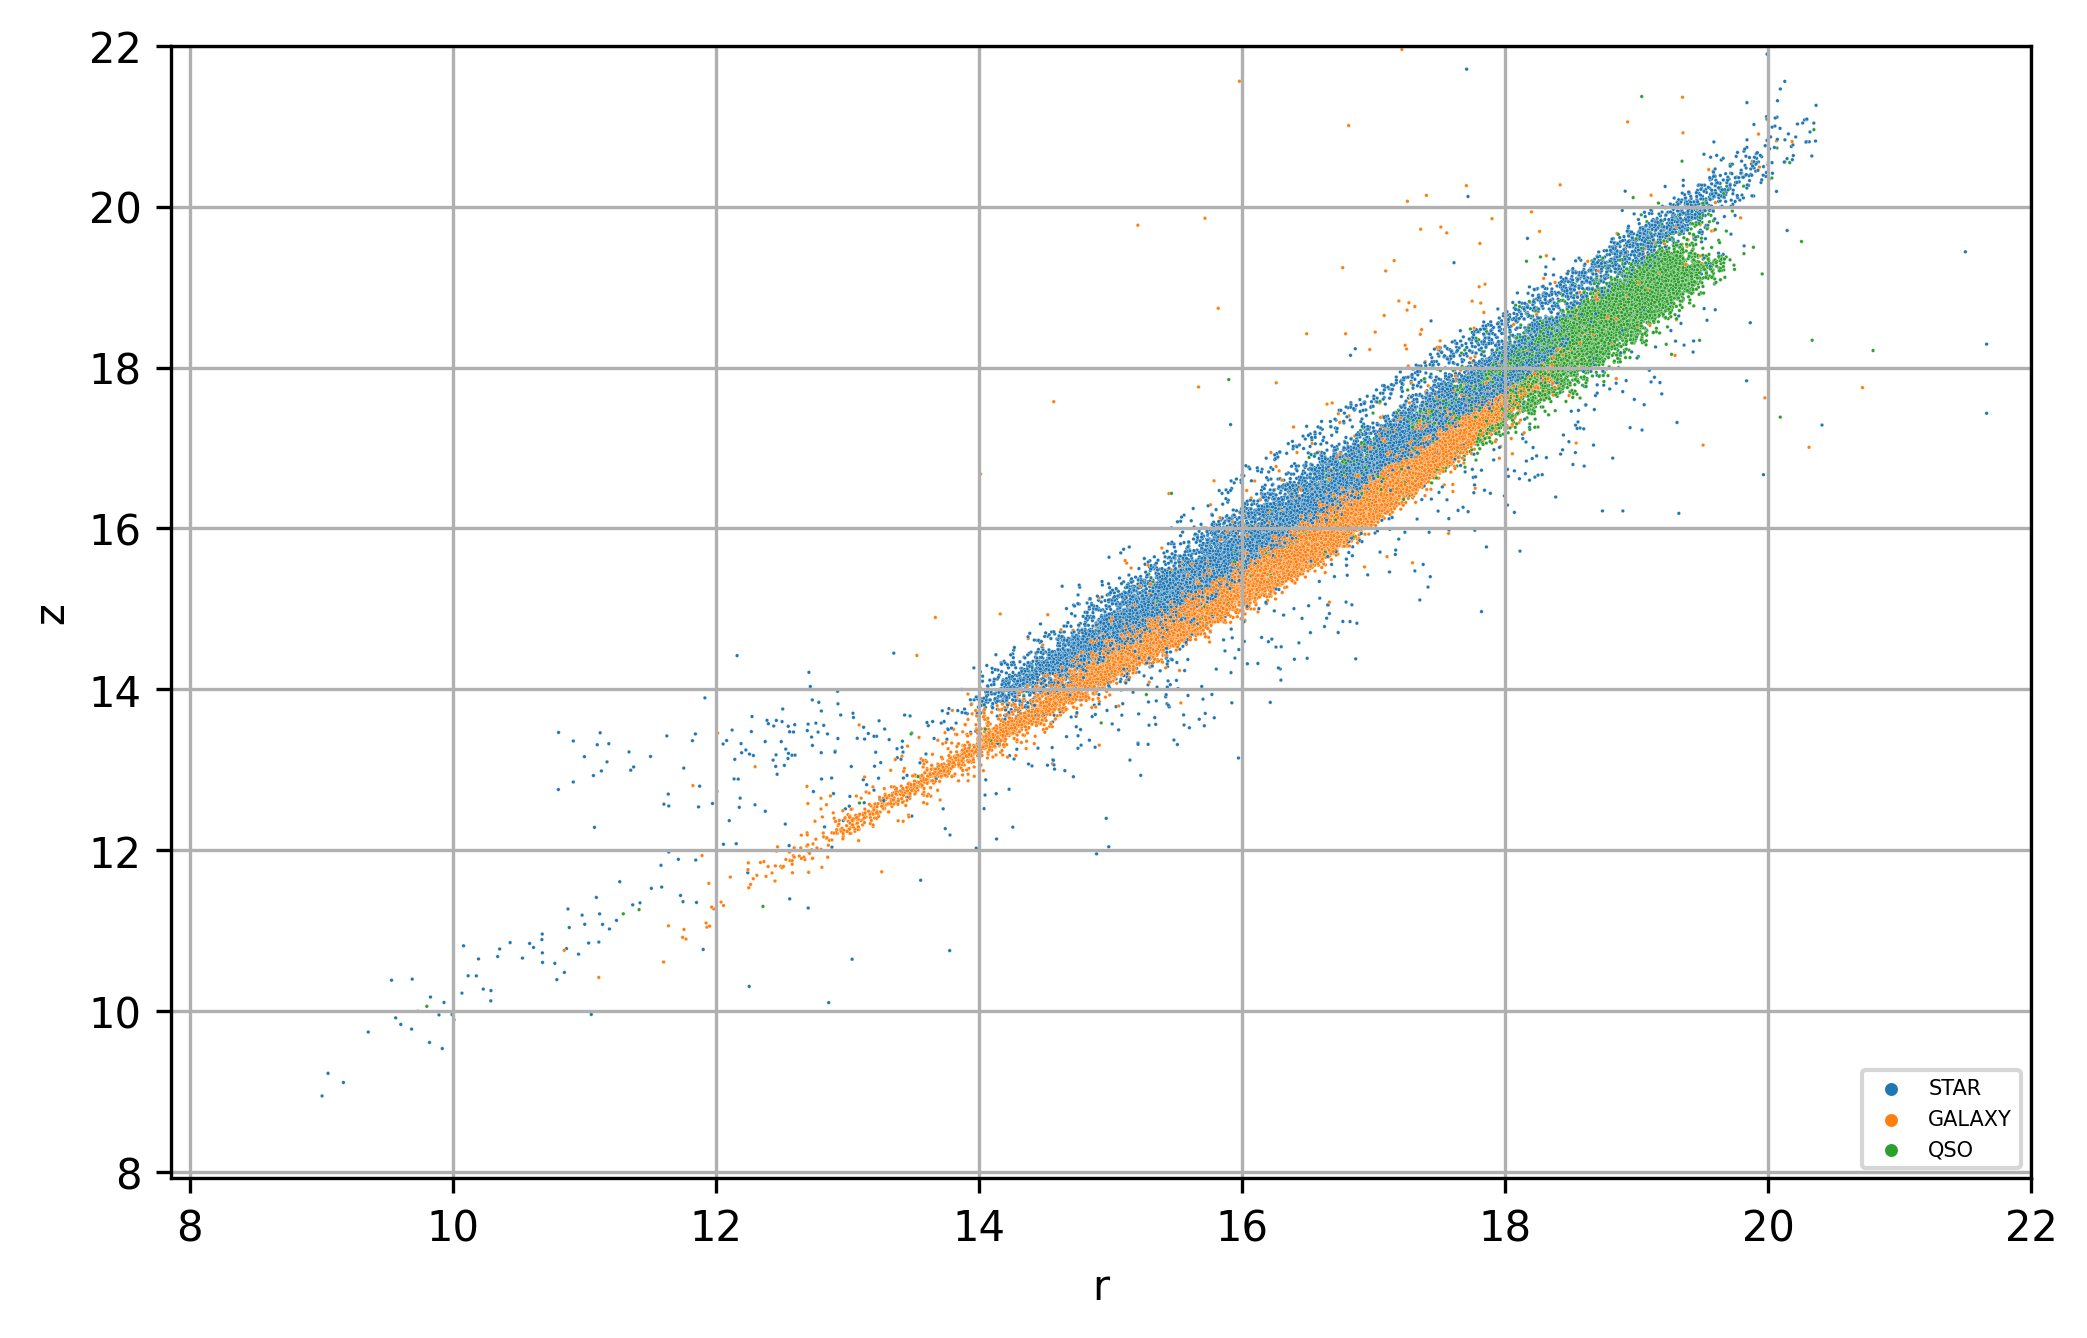

In [23]:
fig, ax = plt.subplots(figsize = (8,5), dpi = 300)

sky_plot = sns.scatterplot(x = 'r', y = 'z', data = df_sky, hue = 'class', s = 0.75)
plt.grid()
plt.xlim(right = 22)
plt.ylim(top = 22) 
plt.legend(fontsize = 5, loc = 4, markerscale = 0.35)

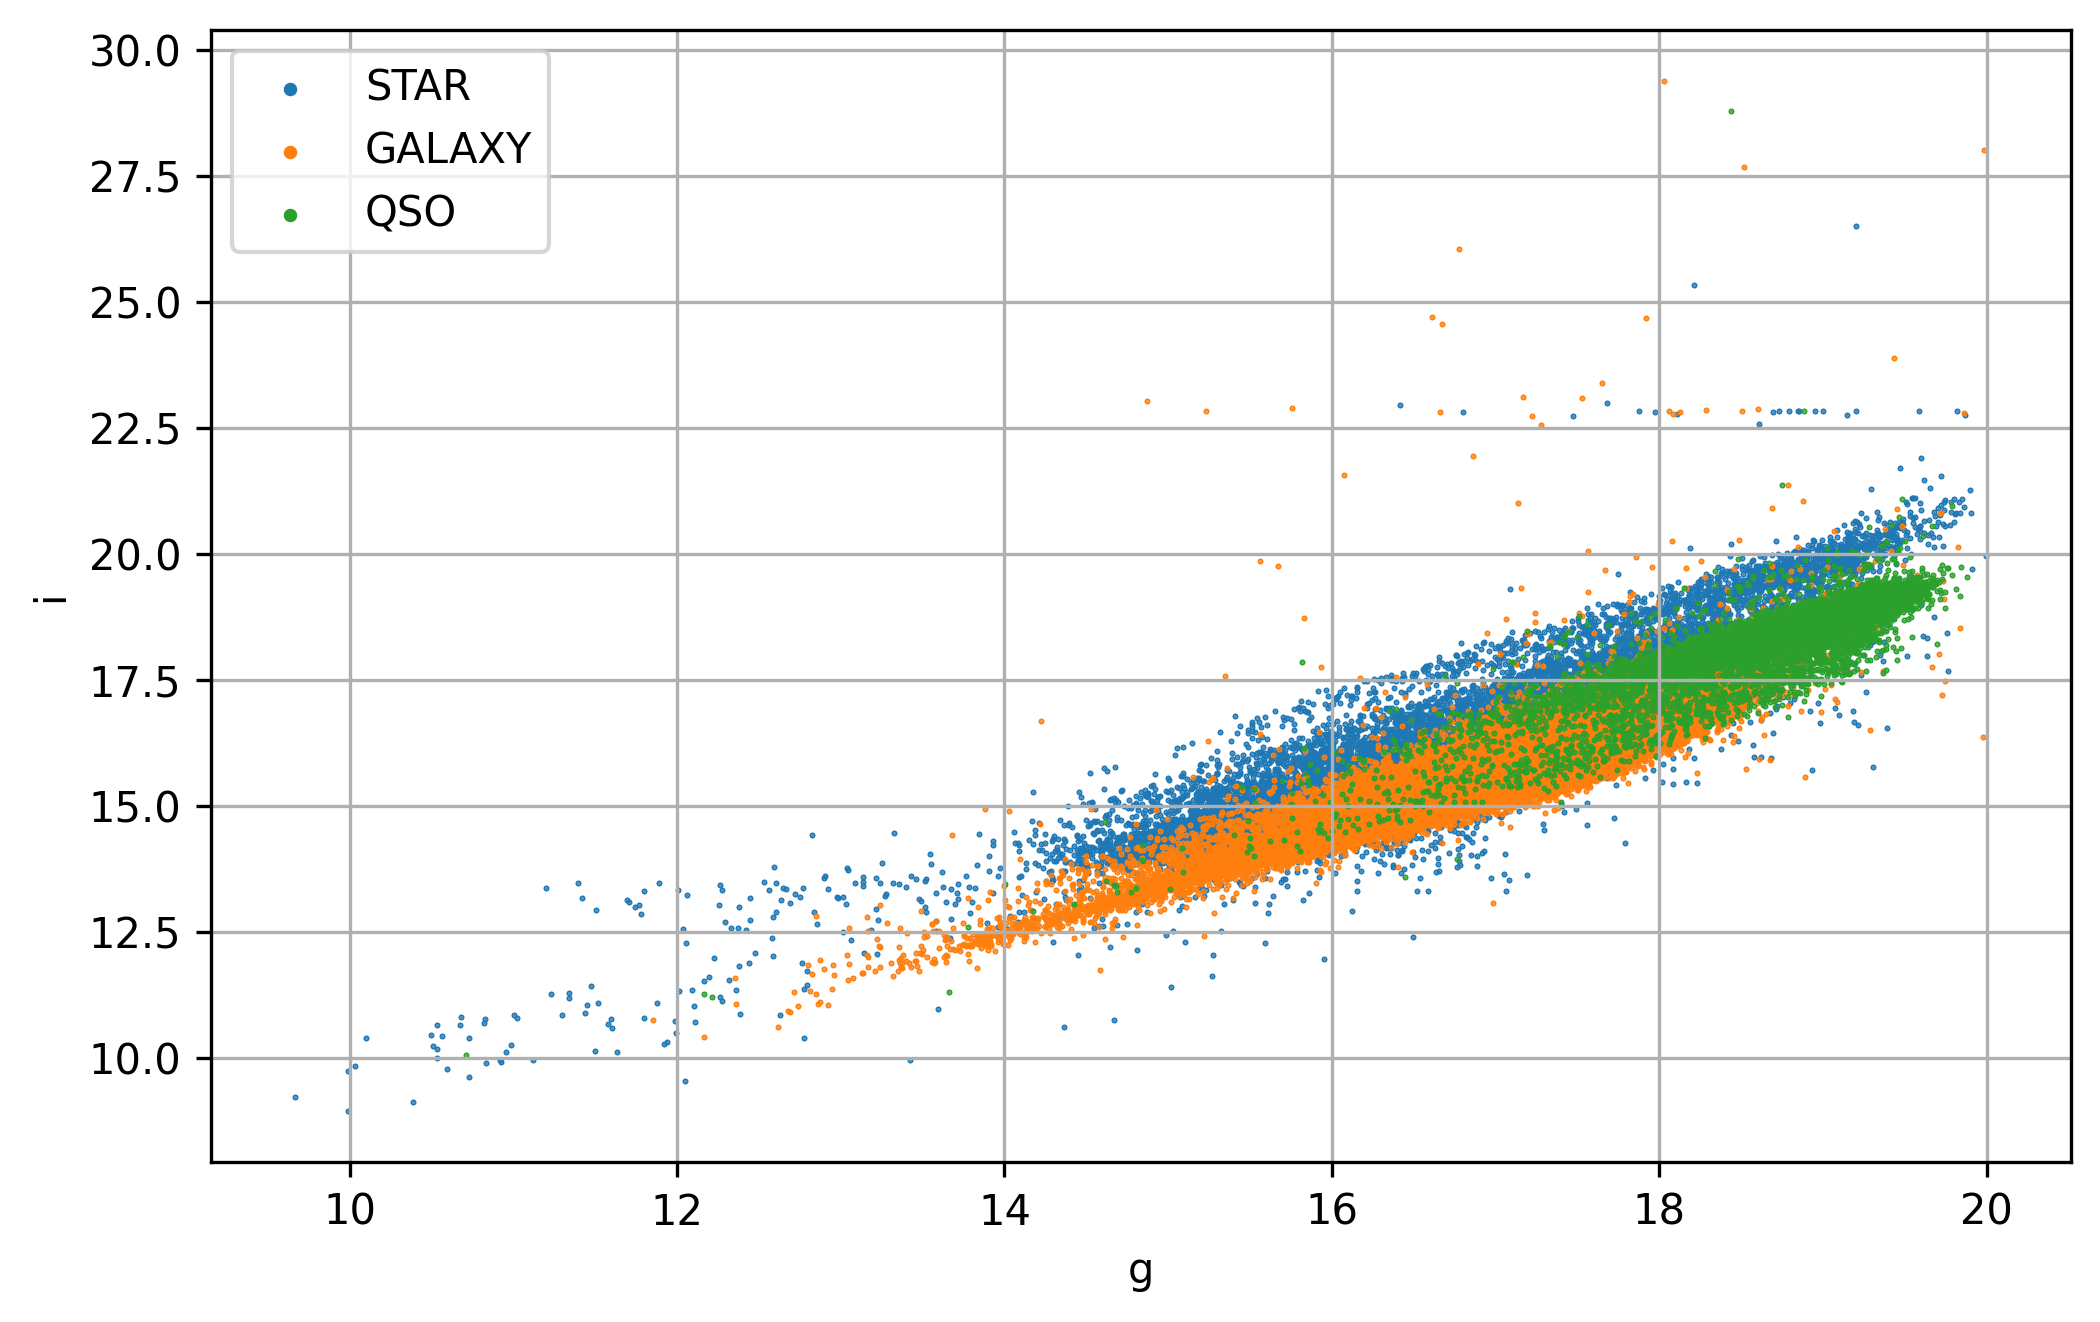

In [22]:
fig, ax = plt.subplots(figsize = (8,5), dpi = 300)

ax.scatter(df_sky.loc[df_sky['class'] == 'STAR', ['g']], 
           df_sky.loc[df_sky['class'] == 'STAR', ['z']], s = 0.2, label = 'STAR')
ax.scatter(df_sky.loc[df_sky['class'] == 'GALAXY', ['g']], 
           df_sky.loc[df_sky['class'] == 'GALAXY', ['z']], s = 0.2, label = 'GALAXY')
ax.scatter(df_sky.loc[df_sky['class'] == 'QSO', ['g']], 
           df_sky.loc[df_sky['class'] == 'QSO', ['z']], s = 0.2, label = 'QSO')
ax.set_xlabel("g")
ax.set_ylabel("i")
ax.grid(True)
plt.legend(markerscale = 5)

In [27]:
# KNN classification

np.random.seed(10)
train_values = np.random.choice(range(df_dim_sky[0]), size = int(df_dim_sky[0]*0.5), replace = False)
mask_values = np.isin(np.array(range(df_dim_sky[0])), train_values, invert = True)
test_values = np.array(range(df_dim_sky[0]))[mask_values]


Y_train = df_sky.loc[train_values,'class']
X_train = df_sky.loc[train_values,['u', 'g', 'r', 'i', 'z']]

Y_test = df_sky.loc[test_values,'class']
X_test = df_sky.loc[test_values,['u', 'g', 'r', 'i', 'z']]

k_values = list(range(1, 10))
misclass = []

knn_classifier2 = KNeighborsClassifier()
knn_grid = {'n_neighbors': np.arange(1, 6)}

knn_clssr_grid = GridSearchCV(knn_classifier2, knn_grid, cv = 5)

knn_clssr_grid.fit(X_train, Y_train)

print(knn_clssr_grid.best_params_)

knn_clssr_grid.predict(X_test)
misclass2 = 1 - knn_clssr_grid.score(X_test, Y_test)

print(f'The test MSE is {misclass2}')

{'n_neighbors': 3}
The test MSE is 0.05513999999999997


In [36]:
df_compare = pd.DataFrame({"Actual" : Y_test, "Predicted": knn_clssr_grid.predict(X_test)})

In [38]:
df_compare['Misclass'] = df_compare['Actual'] != df_compare['Predicted']

In [44]:
len(df_compare.loc[df_compare['Misclass'] == True])/len(df_compare)

0.05514

In [48]:
df_compare['r'] = df_sky.loc[test_values,['r']]
df_compare['z'] = df_sky.loc[test_values,['z']]

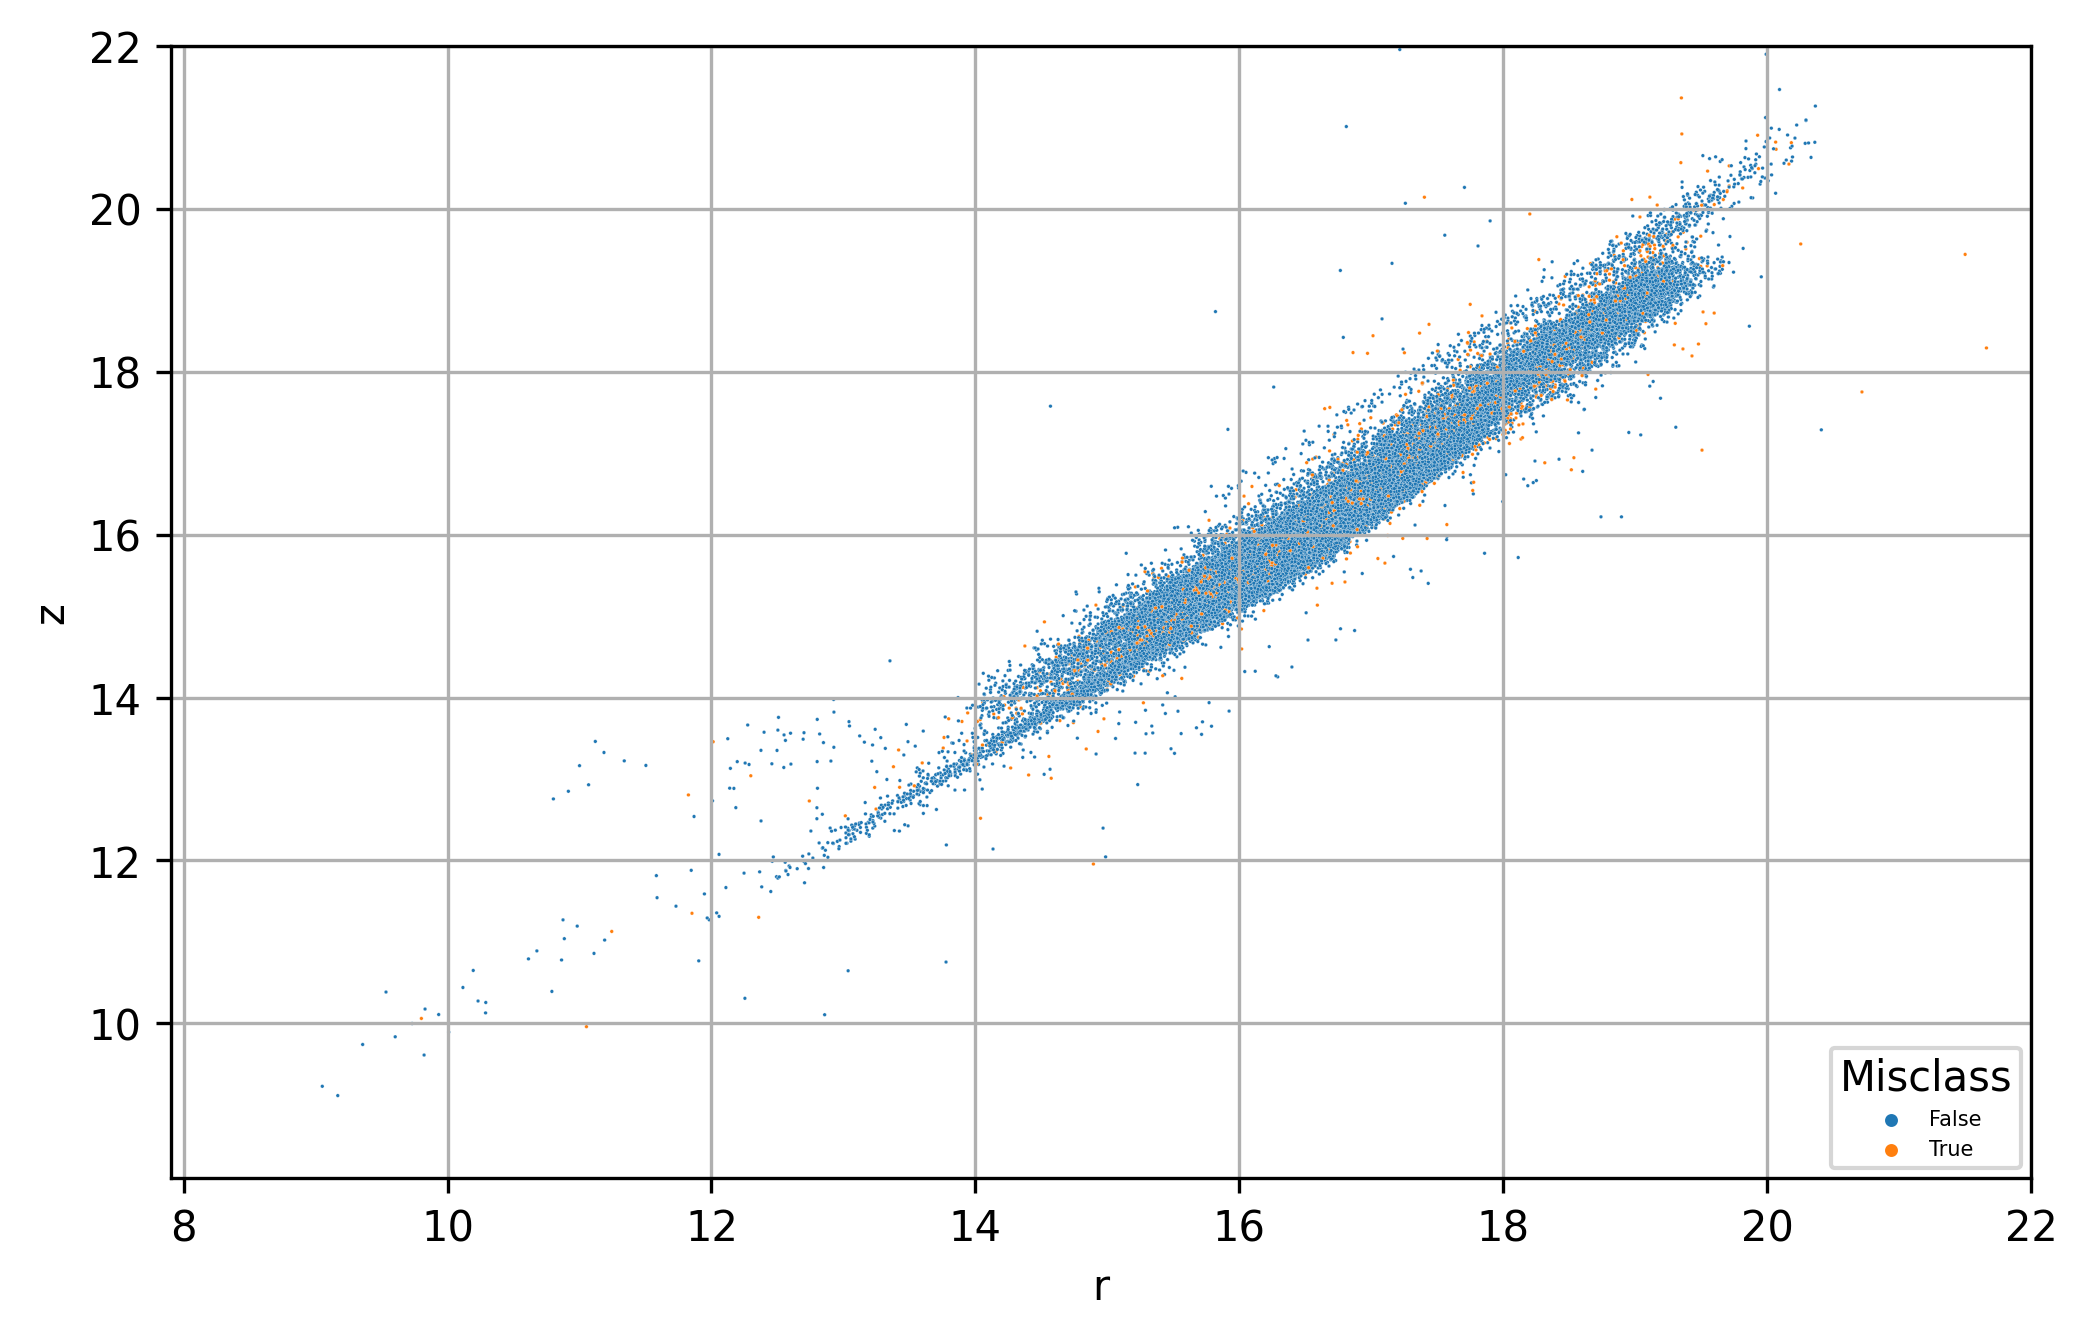

In [51]:
fig, ax = plt.subplots(figsize = (8,5), dpi = 300)

sky_plot = sns.scatterplot(x = 'r', y = 'z', data = df_compare, hue = 'Misclass', s = 0.75)
plt.grid()
plt.xlim(right = 22)
plt.ylim(top = 22) 
plt.legend(fontsize = 5, loc = 4, markerscale = 0.35, title = "Misclass")